In [1]:
import pandas as pd
import numpy as np

s = pd.Series([1, 3, 5, 7, np.nan])

dates = pd.date_range('20200101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=['A', 'B', 'C', 'D'])

df['A']
df.B
df[:2]
df['20200104':'20200105']

df.loc['20200106']
df.loc[:, ['A', 'B']]
df.loc['20200106':, ['C']]
df.loc['20200106', ['C']]

df.iloc[3]
df.iloc[0, 0]
df.iloc[0:3]
df.iloc[[1, 3, 5], 1:2]

df[df.A > 1]

df.iloc[2,2] = '《V 字仇杀队》'
df.loc['20200101', 'A'] = '《寄生虫》'
# df[df.D > 0] = 0
# df.B[df.D > 0] = 0

df['F'] = np.nan
df['F'] = pd.Series(list(range(100, 700, 100)), index=pd.date_range('20200101', periods=6))

df.loc['20200105','B'] = np.nan
df.iloc[5,4] = np.nan

df10 = df.dropna(axis=0, how='any')
df20 = df.fillna(value='《熔炉》')

df.isnull()
np.any(df.isnull() == True)

True

In [31]:
dic = {
    'A': pd.Timestamp('20200101'),
    'B': pd.Series([10, 20, 30, 40], index=list(range(4)), dtype='float32'),
    'C': pd.Categorical(['z', 'y', 'x', 'a']),
    'D': '果'
}

df00 = pd.DataFrame(dic)
df00

# df00.dtypes
# df00.index
# df00.columns
# df00.values
# df00.describe()
# df00.T
# df00.sort_index(axis=0, ascending=False)
# df00.sort_index(axis=1, ascending=False)
df00.sort_values(by='C')

,A,B,C,D
3,2020-01-01,40.0,a,果
2,2020-01-01,30.0,x,果
1,2020-01-01,20.0,y,果
0,2020-01-01,10.0,z,果


In [4]:
left = pd.DataFrame({
    'key': ['K0', 'K1', 'K2', 'K3'],
     'A': ['A0', 'A1', 'A2', 'A3'],
     'B': ['B0', 'B1', 'B2', 'B3']
})
right = pd.DataFrame({
    'key': ['K0', 'K1', 'K2', 'K3'],
    'C': ['C0', 'C1', 'C2', 'C3'],
    'D': ['D0', 'D1', 'D2', 'D3']
})

[left, right]

pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [7]:
# consider two keys
left = pd.DataFrame({
    'key1': ['K0', 'K0', 'K1', 'K2'],
     'key2': ['K0', 'K1', 'K0', 'K1'],
     'A': ['A0', 'A1', 'A2', 'A3'],
     'B': ['B0', 'B1', 'B2', 'B3']
})

right = pd.DataFrame({
    'key1': ['K0', 'K1', 'K1', 'K2'],
    'key2': ['K0', 'K0', 'K0', 'K0'],
    'C': ['C0', 'C1', 'C2', 'C3'],
    'D': ['D0', 'D1', 'D2', 'D3']
})

[left, right]

pd.merge(left, right, on=['key1', 'key2'], how='inner')  # default for how='inner'
# how = ['left', 'right', 'outer', 'inner']
pd.merge(left, right, on=['key1', 'key2'], how='left')

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [8]:
# merged by index
left = pd.DataFrame({
    'A': ['A0', 'A1', 'A2'],
    'B': ['B0', 'B1', 'B2']
}, index=['K0', 'K1', 'K2'])
right = pd.DataFrame({
    'C': ['C0', 'C2', 'C3'],
    'D': ['D0', 'D2', 'D3']
}, index=['K0', 'K2', 'K3'])
print(left)
print(right)

# left_index and right_index
res = pd.merge(left, right, left_index=True, right_index=True, how='outer')
res = pd.merge(left, right, left_index=True, right_index=True, how='inner')

# handle overlapping
boys = pd.DataFrame({
    'k': ['K0', 'K1', 'K2'], 
    'age': [1, 2, 3]
})
girls = pd.DataFrame({
    'k': ['K0', 'K0', 'K3'], 
    'age': [4, 5, 6]
})
res = pd.merge(boys, girls, on='k', suffixes=['_boy', '_girl'], how='inner')
print(res)

     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2
     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3
    k  age_boy  age_girl
0  K0        1         4
1  K0        1         5


In [9]:
# indicator
df1 = pd.DataFrame({'col1':[0,1], 'col_left':['a','b']})
df2 = pd.DataFrame({'col1':[10,20,30], 'col_right':[20,20,20]})

print(df1)
print(df2)

pd.merge(df1, df2, on='col1', how='outer', indicator=True)

# give the indicator a custom name
pd.merge(df1, df2, on='col1', how='outer', indicator='indicator_column')

   col1 col_left
0     0        a
1     1        b
   col1  col_right
0    10         20
1    20         20
2    30         20


,col1,col_left,col_right,indicator_column
0,0,a,NaN,left_only
1,1,b,NaN,left_only
2,10,NaN,20.0,right_only
3,20,NaN,20.0,right_only
4,30,NaN,20.0,right_only


In [ ]:
# concatenating
# ignore index
df1 = pd.DataFrame(np.zeros((3,4)), columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1.1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2.2, columns=['a','b','c','d'])
res = pd.concat([df1, df2, df3], axis=0, ignore_index=True)

# # join, ('inner', 'outer')
df1 = pd.DataFrame(np.zeros((3,4)) + 1.1, columns=['a','b','c','d'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*3.3, columns=['b','c','d', 'e'], index=[2,3,4])
# res = pd.concat([df1, df2], axis=0, join='outer')
res = pd.concat([df1, df2], axis=0, join='inner') 

# # append
# df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
# df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
# df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d', 'e'], index=[2,3,4])
# res = df1.append(df2, ignore_index=True)
# res = df1.append([df2, df3])

# s1 = pd.Series([1,2,3,4], index=['a','b','c','d'])
# res = df1.append(s1, ignore_index=True)


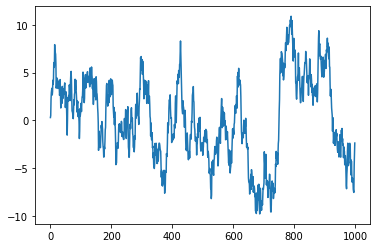

In [144]:
import matplotlib.pyplot as plt

# plot data

# Series
data = pd.Series(np.random.randn(1000), index=np.arange(1000))
data = data.cumsum()
data.plot()

# DataFrame
data = pd.DataFrame(np.random.randn(1000, 4), index=np.arange(1000), columns=list("ABCD"))
data = data.cumsum()
# plot methods:
# 'bar', 'hist', 'box', 'kde', 'area', scatter', hexbin', 'pie'
# ax = data.plot.scatter(x='A', y='B', color='DarkBlue', label="Class 1")
# data.plot.scatter(x='A', y='C', color='LightGreen', label='Class 2', ax=ax)

plt.show()